In [1]:
library(forecast)
setwd("C:/Users/joyh1/Desktop/빅데이터_20-1/R_data")
data<-read.csv('data_ARIMA_DIY.csv')
data

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



data_1,data_2,data_3,data_4
<dbl>,<dbl>,<dbl>,<dbl>
108.2,108.9,-1.31,1.17
93.6,115.8,1.49,4.06
99.2,102.1,-2.24,0.40
94.1,101.2,4.08,6.77
96.2,98.7,-3.24,-0.48
111.6,87.4,0.61,3.41
94.7,86.6,0.39,5.23
110.5,88.1,0.07,4.93
82.4,101.4,-0.35,4.52


In [3]:
data_1<-data[,1]
data_2<-data[,2]
data_3<-data[,3]
data_4<-data[,4]

In [4]:
ts_1<-ts(data_1, start=c(2001,1), end=c(2006,12), frequency = 12)
ts_2<-ts(data_2, start=c(2001,1), end=c(2006,12), frequency = 12)
ts_3<-ts(data_3, start=c(2001,1), end=c(2006,12), frequency = 12)
ts_4<-ts(data_4, start=c(2001,1), end=c(2006,12), frequency = 12)

# data_1에 적합한 모델 찾기


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 3 lags. 

Value of test-statistic is: 0.0449 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


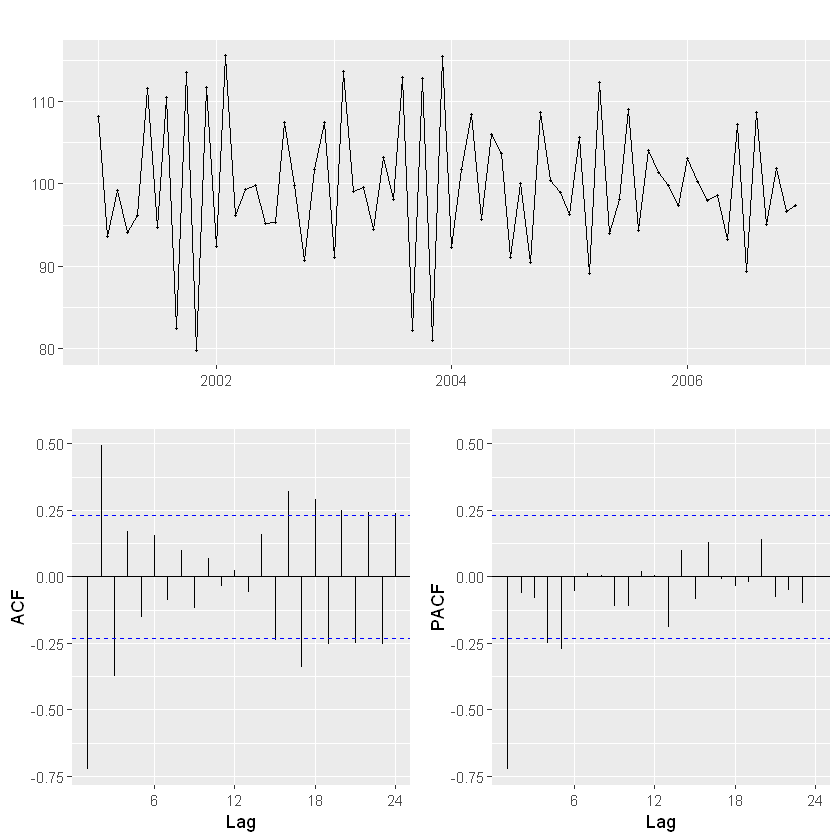

In [5]:
library(urca)
summary(ur.kpss(ts_1))
ggtsdisplay(ts_1)
# KPSS검정통계량 값이 0.0449로 1% 유의수준의 임계치보다 작은 값이 나왔으므로 귀무가설(해당 데이터는 정상시계열이다)을 채택!

In [7]:
# PACF그래프에서 막대 1개가 팍 튀어나왔으므로 AR차수는 1일 것임!
# ACF그래프에서는 MA차수가 0 또는 1 또는 2
# 모델후보
# ARIMA(1,0,0)
# ARIMA(1,0,1)
# ARIMA(1,0,2)

arima100<-Arima(ts_1, order=c(1,0,0))
arima101<-Arima(ts_1, order=c(1,0,1))
arima102<-Arima(ts_1, order=c(1,0,2))
arima_auto<-auto.arima(ts_1)

summary(arima100)
summary(arima101)
summary(arima102)
summary(arima_auto)
# AICc값이 ARIMA(1,0,0)모델이 가장 낮게 나옴!
# 세 개 모델의 각 RMSE값들이 0.1~0.01로 미세한 차이..
# 따라서 차수가 가장 적은 ARIMA(1,0,0)으로 선택!

### 수식 ###
# ARIMA(1,0,0) : yt = (-0.7248)*yt-1 + εt + 99.8025*(1-(-0.7248))
# ARIMA(1,0,1) : yt = (-0.6608)*yt-1 + (-0.1351)*εt-1 + εt + 99.8060*(1-(-0.6608))
# ARIMA(1,0,2) : yt = (-0.7983)*yt-1 + (-0.1495)*εt-1 + (-0.39)*εt-2 + εt + 99.8598*(1-(-0.7983))

Series: ts_1 
ARIMA(1,0,0) with non-zero mean 

Coefficients:
          ar1     mean
      -0.7248  99.8025
s.e.   0.0796   0.3885

sigma^2 estimated as 32.87:  log likelihood=-227.26
AIC=460.51   AICc=460.87   BIC=467.34

Training set error measures:
                     ME     RMSE      MAE        MPE    MAPE     MASE
Training set 0.04825857 5.653194 4.693908 -0.2869442 4.78306 0.521642
                    ACF1
Training set -0.04736431
Series: ts_1 
ARIMA(1,0,1) with non-zero mean 

Coefficients:
          ar1      ma1     mean
      -0.6608  -0.1351  99.8060
s.e.   0.1433   0.2221   0.3486

sigma^2 estimated as 33.14:  log likelihood=-227.04
AIC=462.08   AICc=462.68   BIC=471.19

Training set error measures:
                    ME     RMSE      MAE        MPE     MAPE      MASE
Training set 0.0500186 5.635482 4.614241 -0.2840783 4.706057 0.5127884
                   ACF1
Training set 0.01135671
Series: ts_1 
ARIMA(1,0,2) with non-zero mean 

Coefficients:
          ar1      ma1     


	Ljung-Box test

data:  Residuals from ARIMA(1,0,0) with non-zero mean
Q* = 13.366, df = 12, p-value = 0.343

Model df: 2.   Total lags used: 14



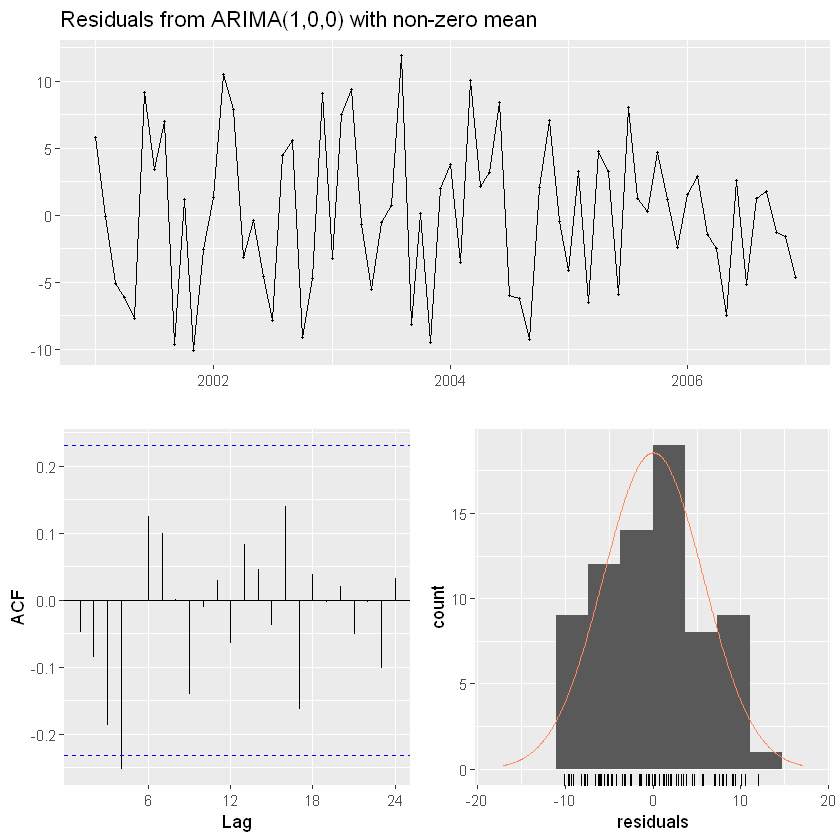

In [8]:
# Test데이터와의 RMSE값 비교가가능하다면 그걸 추가로 통해서 최종 적합모델 선정했을 거임
# 현재로서는 ARIMA(1,0,0)모델이 가장 적합
# ARIMA(1,0,0)의 잔차 검정
checkresiduals(arima100)

In [9]:
forecast(arima100, h=5)

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 2007      101.54389 94.19626 108.8915 90.30666 112.7811
Feb 2007       98.54033 89.46560 107.6151 84.66173 112.4189
Mar 2007      100.71736 90.85575 110.5790 85.63533 115.7994
Apr 2007       99.13941 88.88857 109.3902 83.46211 114.8167
May 2007      100.28314 89.83362 110.7326 84.30199 116.2643

# data_2의 적합모델 찾기


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 3 lags. 

Value of test-statistic is: 0.191 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


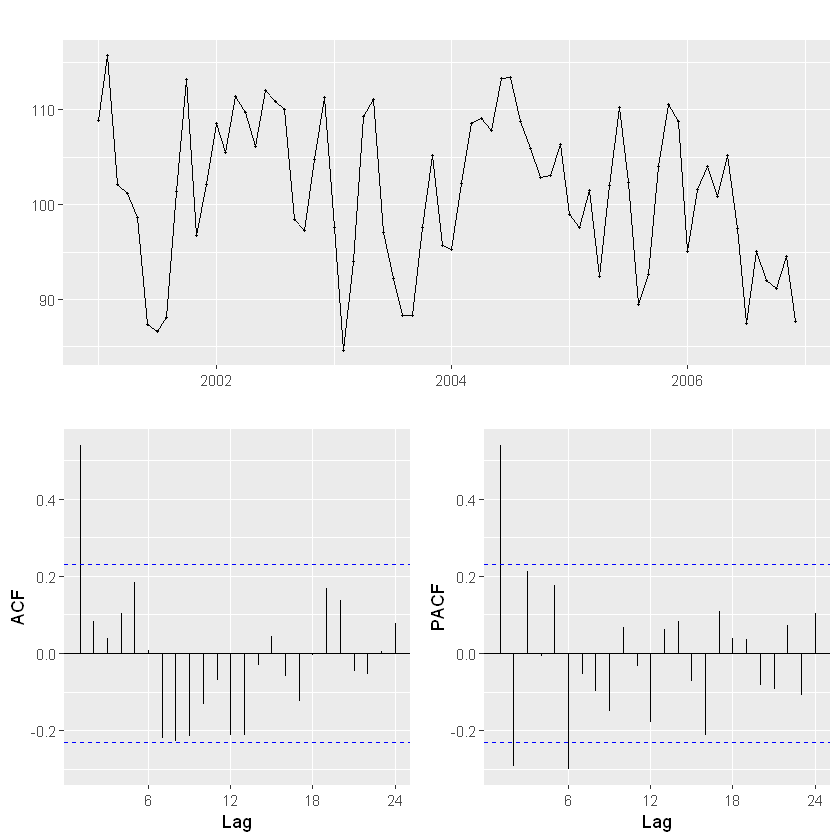

In [10]:
summary(ur.kpss(ts_2))
ggtsdisplay(ts_2)
# KPSS검정통계량값이 1% 유의수준의 임계치보다 작기 때문에 귀무가설(해당 시계열 데이터는 정상서이다) 채택!

In [11]:
# ACF그래프에서 팍 튀는 막대가 1개이면서 지수 감소.. MA(1) 이거나 MA(0)
# PACF 그래프에서 팍 튀는 막대가 1개이면서 지수 감소.. AR(1) 이거나 AR(0) 
# ARMA모델이 적합할라나..?

# 모델 후보 #
# ARIMA(0,0,1)
# ARIMA(1,0,0)
# ARIMA(1,0,1)
# AUTO ARIMA

arima001<-Arima(ts_2, order=c(0,0,1))
arima100<-Arima(ts_2, order=c(1,0,0))
arima101<-Arima(ts_2, order=c(1,0,1))
arima_auto<-auto.arima(ts_2)

summary(arima001)
summary(arima100)
summary(arima101)
summary(arima_auto) # SARIMA모델은 시험범위 아니므로 제외하고 나머지 모델에서 최종모델 선정

# 모델 수식 #
# ARIMA(0,0,1) : yt = 0.8060*εt-1 + εt + 101.1013
# ARIMA(1,0,0) : yt = 0.5621*yt-1 + εt + 101.1344*(1-0.5621)
# ARIMA(1,0,1) : yt = 0.1278*yt-1 + 0.7592*εt-1 + εt + 101.0675(1-0.1278)

Series: ts_2 
ARIMA(0,0,1) with non-zero mean 

Coefficients:
         ma1      mean
      0.8060  101.1013
s.e.  0.0685    1.2672

sigma^2 estimated as 36.91:  log likelihood=-231.58
AIC=469.16   AICc=469.51   BIC=475.99

Training set error measures:
                     ME     RMSE      MAE        MPE   MAPE     MASE     ACF1
Training set 0.01080688 5.990457 5.072266 -0.3777207 5.0942 0.496875 0.083606
Series: ts_2 
ARIMA(1,0,0) with non-zero mean 

Coefficients:
         ar1      mean
      0.5621  101.1344
s.e.  0.0993    1.7543

sigma^2 estimated as 45.24:  log likelihood=-238.57
AIC=483.14   AICc=483.49   BIC=489.97

Training set error measures:
                      ME     RMSE      MAE       MPE     MAPE      MASE
Training set -0.07901146 6.631726 5.645538 -0.522692 5.673341 0.5530323
                  ACF1
Training set 0.1661977
Series: ts_2 
ARIMA(1,0,1) with non-zero mean 

Coefficients:
         ar1     ma1      mean
      0.1278  0.7592  101.0675
s.e.  0.1462  0.0959    1.


	Ljung-Box test

data:  Residuals from ARIMA(0,0,1) with non-zero mean
Q* = 15.338, df = 12, p-value = 0.2235

Model df: 2.   Total lags used: 14



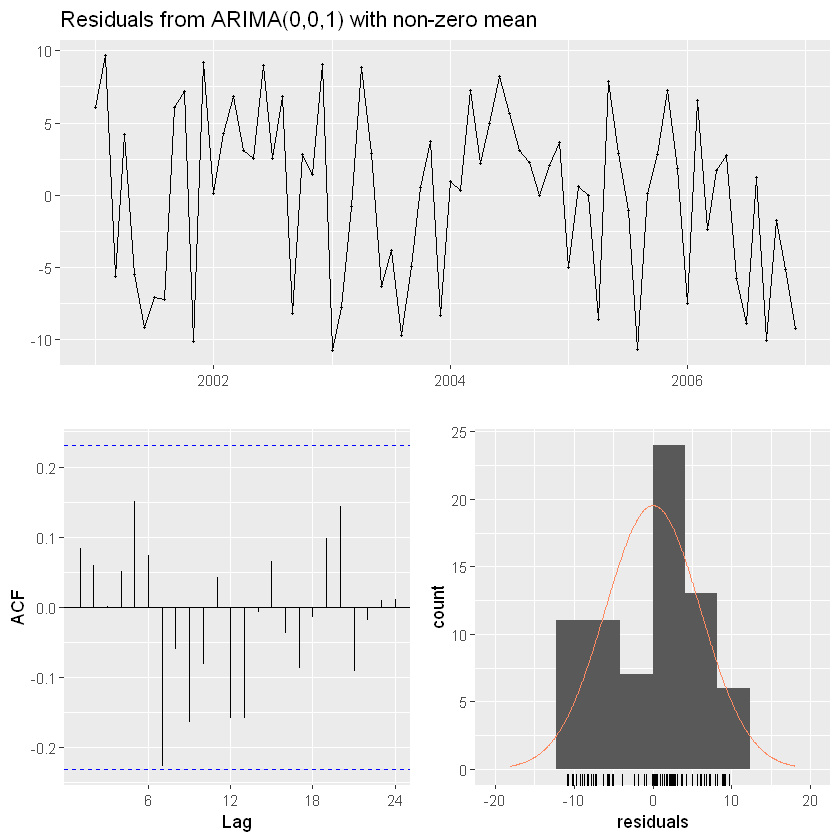

In [12]:
# ARIMA(0,0,1) 과 ARIMA(1,0,1) 모델이 후보
# AICc값은 MA(1) 모델이 더 낮긴 하지만 RMSE값은 ARMA(1,1)모델이 좀 더 낮은편..
# 이 둘 중 적합성을 가르기 위해선 TEST데이터가 있을 경우 TEST데이터와의 RMSE값 비교로 설정!
# 우선은 RMSE값 차이가 소수점 둘째 자리로 매우 미세...하므로 차수가 더 낮은 MA(1)모델을 최종모델로 선정!

# 잔차검정
checkresiduals(arima001)

In [17]:
# 5개의 미래값 예측해보기
for_arima001<-forecast(arima001, h=5)

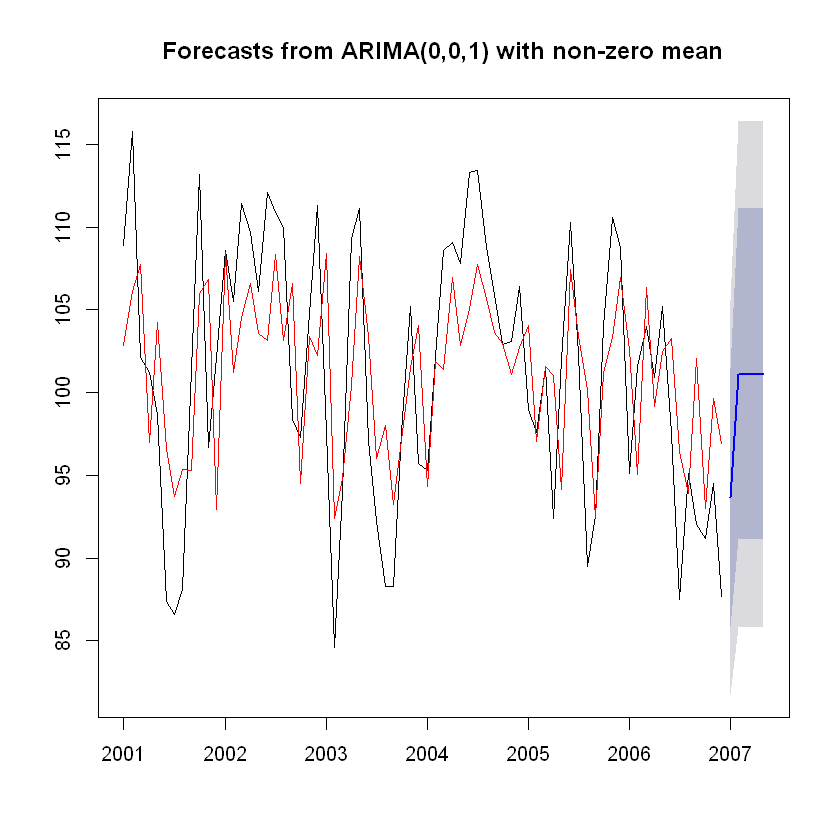

In [19]:
plot(for_arima001)
lines(for_arima001$fitted, col='red')

# data_3에 적합한 모델


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 3 lags. 

Value of test-statistic is: 0.0482 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


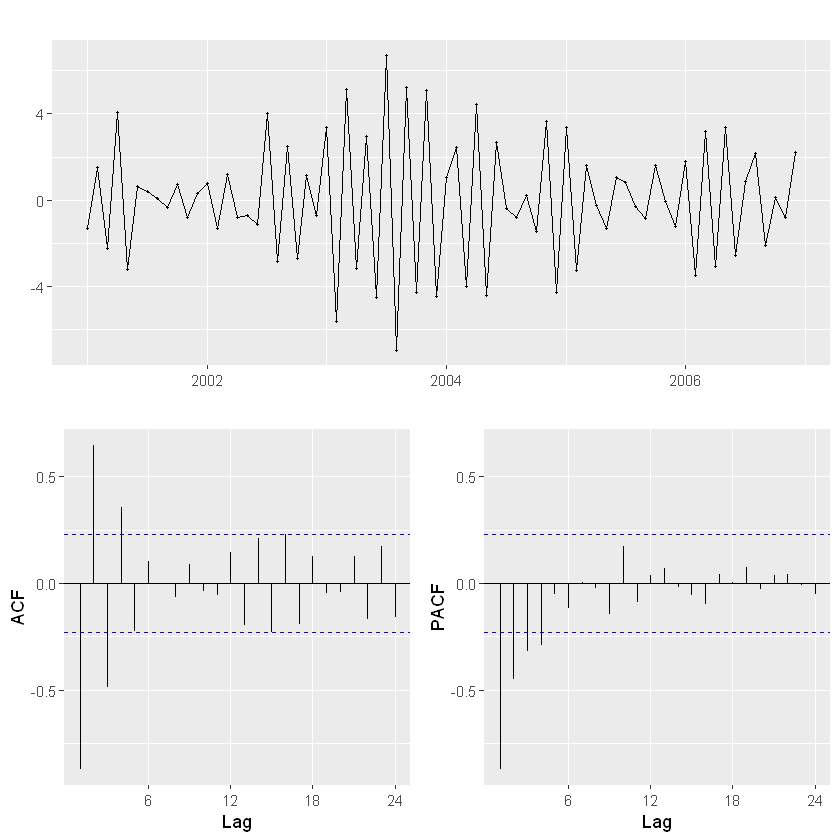

In [20]:
summary(ur.kpss(ts_3))
ggtsdisplay(ts_3)
# KPSS 검정통계량값이 0.0482로 1% 유의수준의 임계치보다 낮으므로 귀무가설(해당 데이터는 정상성이다) 채택!

In [21]:
# ACF함수에서 눈에띄게 튀어나온 막대개수는 2개.. 그래서 MA(1) or MA(2)
# PACF함수에서 눈에띄게 튀어나온 막대개수는 1개.. 그래서 AR(0) or AR(1)

# 모델 후보 $
# ARIMA(0,0,1)
# ARIMA(0,0,2)
# ARIMA(1,0,1)
# ARIMA(1,0,2)
# AUTO ARIMA

arima001<-Arima(ts_3, order=c(0,0,1))
arima002<-Arima(ts_3, order=c(0,0,2))
arima101<-Arima(ts_3, order=c(1,0,1))
arima102<-Arima(ts_3, order=c(1,0,2))
arima_auto<-auto.arima(ts_3)

summary(arima001)
summary(arima002)
summary(arima101)
summary(arima102)
summary(arima_auto)
## 모델 수식 ##
# ARIMA(0,0,1) : yt = -1*εt-1 + εt -0.0114
# ARIMA(0,0,2) : yt = -1.5044εt-1 + 0.6419εt-2 -0.0061
# ARIMA(1,0,1) : yt = -0.7634*yt-1 -0.8175*εt-1 + εt -0.0085*(1-(-0.7634))
# ARIMA(1,0,2) : yt = -0.6997*yt-1 -0.9543*εt-1 + 0.1526*εt-2 -0.0079*(1-(-0.6997))

Series: ts_3 
ARIMA(0,0,1) with non-zero mean 

Coefficients:
          ma1     mean
      -1.0000  -0.0114
s.e.   0.0429   0.0086

sigma^2 estimated as 2.462:  log likelihood=-135.73
AIC=277.46   AICc=277.81   BIC=284.29

Training set error measures:
                     ME     RMSE     MAE     MPE     MAPE      MASE       ACF1
Training set 0.07818892 1.547141 1.22295 34.5077 78.95986 0.3726803 -0.7055275
Series: ts_3 
ARIMA(0,0,2) with non-zero mean 

Coefficients:
          ma1     ma2     mean
      -1.5044  0.6419  -0.0061
s.e.   0.0852  0.0749   0.0201

sigma^2 estimated as 1.515:  log likelihood=-117.03
AIC=242.06   AICc=242.66   BIC=251.17

Training set error measures:
                        ME     RMSE       MAE       MPE     MAPE      MASE
Training set -0.0004353689 1.204927 0.9629576 -5.906828 110.3575 0.2934504
                   ACF1
Training set -0.2794418
Series: ts_3 
ARIMA(1,0,1) with non-zero mean 

Coefficients:
          ar1      ma1     mean
      -0.7634  -0.8175

In [22]:
# ARIMA(1,0,1) , ARIMA(1,0,2) 모델이 최종 후보 모델들
# 다시비교
summary(arima101)
summary(arima102)

Series: ts_3 
ARIMA(1,0,1) with non-zero mean 

Coefficients:
          ar1      ma1     mean
      -0.7634  -0.8175  -0.0085
s.e.   0.0752   0.0676   0.0140

sigma^2 estimated as 1.173:  log likelihood=-107.86
AIC=223.73   AICc=224.32   BIC=232.83

Training set error measures:
                     ME    RMSE       MAE       MPE     MAPE      MASE
Training set 0.01356656 1.06044 0.8624718 -28.78277 112.6165 0.2628285
                    ACF1
Training set -0.07653604
Series: ts_3 
ARIMA(1,0,2) with non-zero mean 

Coefficients:
          ar1      ma1     ma2     mean
      -0.6997  -0.9543  0.1526  -0.0079
s.e.   0.1133   0.1637  0.1631   0.0154

sigma^2 estimated as 1.177:  log likelihood=-107.46
AIC=224.92   AICc=225.83   BIC=236.3

Training set error measures:
                      ME     RMSE       MAE       MPE     MAPE      MASE
Training set 0.009575647 1.054215 0.8531963 -29.17051 111.5029 0.2600019
                    ACF1
Training set -0.01244931



	Ljung-Box test

data:  Residuals from ARIMA(1,0,1) with non-zero mean
Q* = 9.3905, df = 11, p-value = 0.5859

Model df: 3.   Total lags used: 14



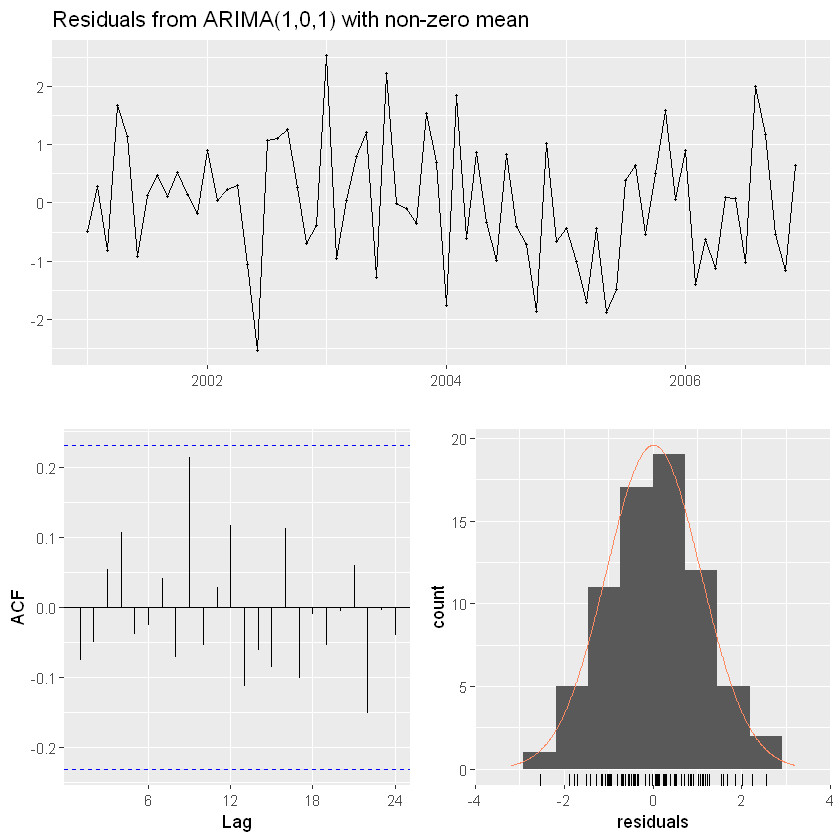

In [23]:
# AICc값은 ARIMA(1,0,1)값이 더 작고 RMSER값은 ARIMA(1,0,2)모델이 더 작다.. 
# 추가 적합성은.... TEST데이터가 있을 시 TEST 데이터와 예측값을 비교를 통해 모델 적합
# 현재로서는 차수가 적은 ARIMA(1,0,1)모델을 최종 선정!

# 잔차검정
checkresiduals(arima101)

In [25]:
# 예측값 
for_arima101<-forecast(arima101, h=5)
for_arima101

         Point Forecast      Lo 80      Hi 80     Lo 95       Hi 95
Jan 2007     -2.2083064 -3.5965447 -0.8200681 -4.331434 -0.08517908
Feb 2007      1.6709073 -0.9260077  4.2678223 -2.300731  5.64254606
Mar 2007     -1.2906404 -4.3811701  1.7998892 -6.017198  3.43591680
Apr 2007      0.9703242 -2.3744695  4.3151179 -4.145096  6.08574469
May 2007     -0.7557871 -4.2402283  2.7286541 -6.084780  4.57320588

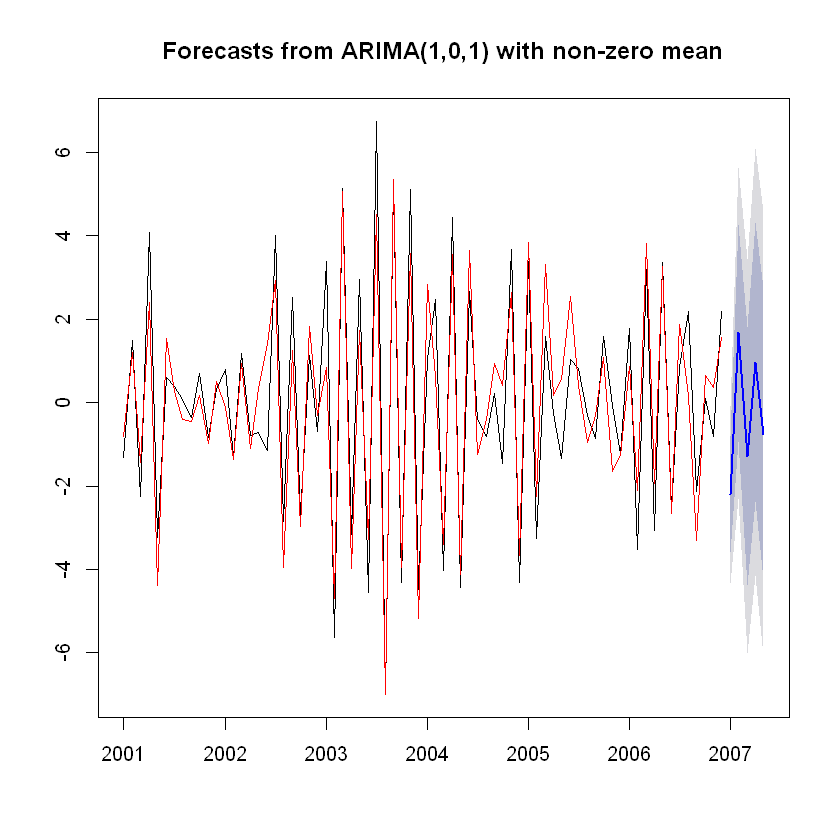

In [26]:
plot(for_arima101)
lines(for_arima101$fitted, col='red')

# data_4에 적합한 모델


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 3 lags. 

Value of test-statistic is: 1.1378 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


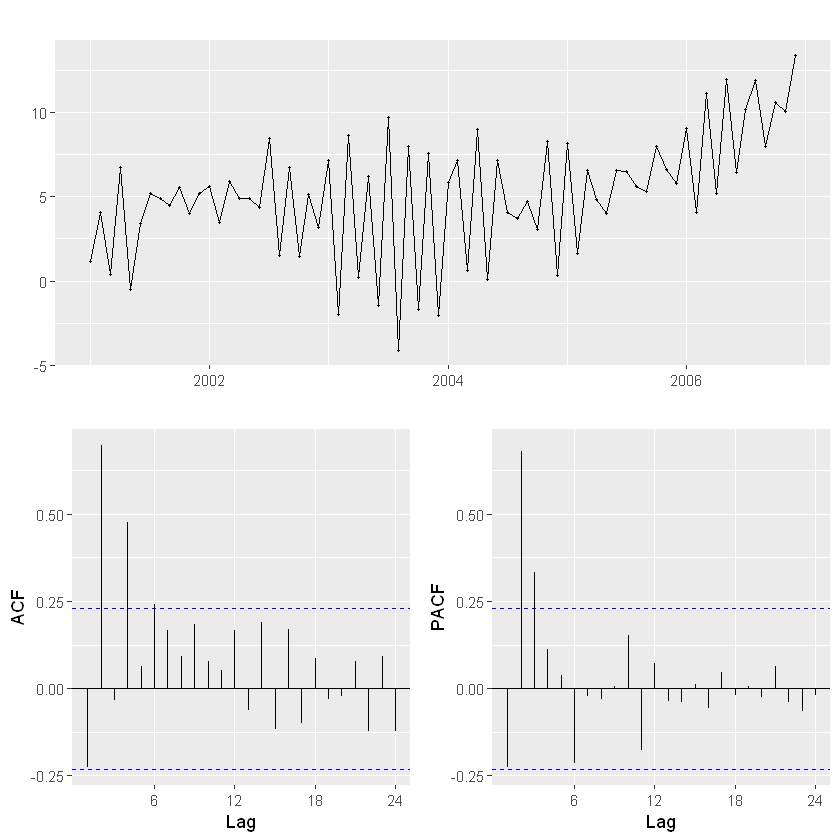

In [27]:
summary(ur.kpss(ts_4))
ggtsdisplay(ts_4)
# KPSS검정 통계량값이 1%유의수준의 임계치보다 큰 값이므로 귀무가설 기각! 즉, 해당 데이터는 비정상성임!
# 따라서 1번 차분을 해주자!


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 3 lags. 

Value of test-statistic is: 0.0874 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


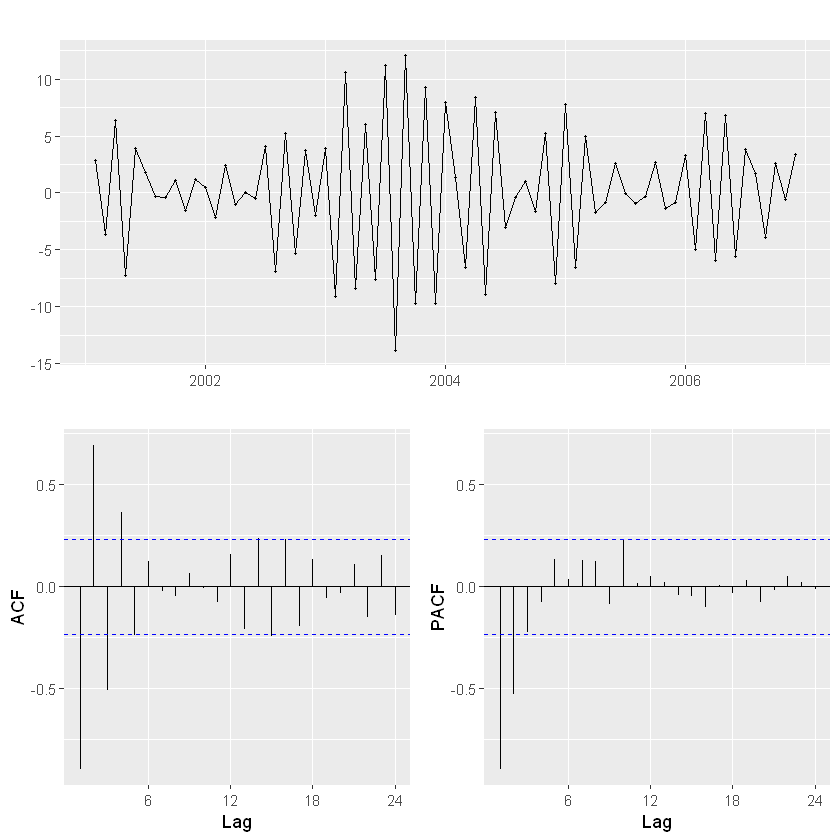

In [28]:
# 1번 차분한 ts_4데이터 검정
summary(ur.kpss(diff(ts_4)))
ggtsdisplay(diff(ts_4))
# 차분한 데이터의 검정통계량값이 0.0874로 1% 유의수준의 임계치보다 작은값! 그러므로 귀무가설(해당 데이터는 정상성임)을 채택!

In [30]:
# PACF그래프를 보았을 때 크게 튀어나온 막대 개수가 1~2개이므로 AR(1) 또는 AR(2)
# ACF그래프를 보았을 때 크게 튀어나온 막대 개수가 1개~3개이므로 MA(1~3)해보기

# 모델후보 #
# ARIMA(1,1,1)
# ARIMA(1,1,2)
# ARIMA(1,1,3)
# ARIMA(2,1,1)
# ARIMA(2,1,2)
# ARIMA(2,1,3)
# AUTO_ARIMA

arima111<-Arima(ts_4, order=c(1,1,1))
arima112<-Arima(ts_4, order=c(1,1,2))
arima113<-Arima(ts_4, order=c(1,1,3))
arima211<-Arima(ts_4, order=c(2,1,1))
arima212<-Arima(ts_4, order=c(2,1,2))
arima213<-Arima(ts_4, order=c(2,1,3))
arima_auto<-auto.arima(ts_4)

summary(arima111) # (1-(-0.8272)B)(1-B)^1 * yt = (1 -0.5649*B)εt + c(c=0)
summary(arima112) # 3개중 가장 적합 모델 # (1 -0.6817*B)(1-B)^1*yt = (1 -0.9508*B + 0.4810*B^2)εt
summary(arima113) # (1-(-0.7387)*B)(1-B)^1 *yt = (1 -0.8667*B + 0.3572*B^2 + 0.0872*B^2)εt

Series: ts_4 
ARIMA(1,1,1) 

Coefficients:
          ar1      ma1
      -0.8272  -0.5649
s.e.   0.0657   0.0778

sigma^2 estimated as 4.363:  log likelihood=-153.18
AIC=312.36   AICc=312.71   BIC=319.14

Training set error measures:
                    ME     RMSE      MAE       MPE     MAPE      MASE      ACF1
Training set 0.4915208 2.044764 1.559208 -2.501261 58.52325 0.4173468 -0.220858
Series: ts_4 
ARIMA(1,1,2) 

Coefficients:
          ar1      ma1     ma2
      -0.6817  -0.9508  0.4810
s.e.   0.1004   0.1187  0.1257

sigma^2 estimated as 3.825:  log likelihood=-148.3
AIC=304.61   AICc=305.22   BIC=313.66

Training set error measures:
                    ME     RMSE      MAE       MPE     MAPE      MASE
Training set 0.3897165 1.900646 1.460845 -20.49255 65.57966 0.3910183
                    ACF1
Training set -0.03936806
Series: ts_4 
ARIMA(1,1,3) 

Coefficients:
          ar1      ma1     ma2     ma3
      -0.7387  -0.8667  0.3572  0.0827
s.e.   0.1383   0.1973  0.2687  0.1653



In [31]:
summary(arima211) # (1 -(-1.1526)*B -(-0.3424)*B^2)(1-B)^1*yt = (1-0.3812*B)*εt
summary(arima212) #가장 적합..(1-(-0.5956)*B -0.0882*B^2)(1-B)^1*yt = (1 -1.0174*B + 0.5096*B^2)εt
summary(arima213) #(1-(-0.9445)*B -(-0.1435)*B^2)(1-B)^1*yt = (1-0.6628*B + 0.17*B^2 + 0.1781*B^3)εt

Series: ts_4 
ARIMA(2,1,1) 

Coefficients:
          ar1      ar2      ma1
      -1.1526  -0.3424  -0.3812
s.e.   0.1489   0.1441   0.1284

sigma^2 estimated as 4.136:  log likelihood=-150.88
AIC=309.76   AICc=310.36   BIC=318.81

Training set error measures:
                    ME     RMSE      MAE        MPE     MAPE      MASE
Training set 0.4810276 1.976322 1.491849 -0.7433238 56.16279 0.3993171
                   ACF1
Training set -0.1064766
Series: ts_4 
ARIMA(2,1,2) 

Coefficients:
          ar1     ar2      ma1     ma2
      -0.5956  0.0882  -1.0174  0.5096
s.e.   0.2434  0.2285   0.2044  0.1320

sigma^2 estimated as 3.875:  log likelihood=-148.22
AIC=306.45   AICc=307.37   BIC=317.76

Training set error measures:
                    ME    RMSE      MAE       MPE     MAPE      MASE
Training set 0.3781545 1.89886 1.456758 -19.54588 64.73132 0.3899245
                    ACF1
Training set -0.05251629
Series: ts_4 
ARIMA(2,1,3) 

Coefficients:
          ar1      ar2      ma1     ma

In [32]:
# 두 개 후보 모델 다시 비교
summary(arima112) # RMSE값이 더 높긴하지만 0.01차이.. AICc값은 212모델에 비해 2가 낮다..그리고 차수도 낮음 이걸로 최종선택!
summary(arima212)

Series: ts_4 
ARIMA(1,1,2) 

Coefficients:
          ar1      ma1     ma2
      -0.6817  -0.9508  0.4810
s.e.   0.1004   0.1187  0.1257

sigma^2 estimated as 3.825:  log likelihood=-148.3
AIC=304.61   AICc=305.22   BIC=313.66

Training set error measures:
                    ME     RMSE      MAE       MPE     MAPE      MASE
Training set 0.3897165 1.900646 1.460845 -20.49255 65.57966 0.3910183
                    ACF1
Training set -0.03936806
Series: ts_4 
ARIMA(2,1,2) 

Coefficients:
          ar1     ar2      ma1     ma2
      -0.5956  0.0882  -1.0174  0.5096
s.e.   0.2434  0.2285   0.2044  0.1320

sigma^2 estimated as 3.875:  log likelihood=-148.22
AIC=306.45   AICc=307.37   BIC=317.76

Training set error measures:
                    ME    RMSE      MAE       MPE     MAPE      MASE
Training set 0.3781545 1.89886 1.456758 -19.54588 64.73132 0.3899245
                    ACF1
Training set -0.05251629



	Ljung-Box test

data:  Residuals from ARIMA(1,1,2)
Q* = 7.0572, df = 11, p-value = 0.7944

Model df: 3.   Total lags used: 14



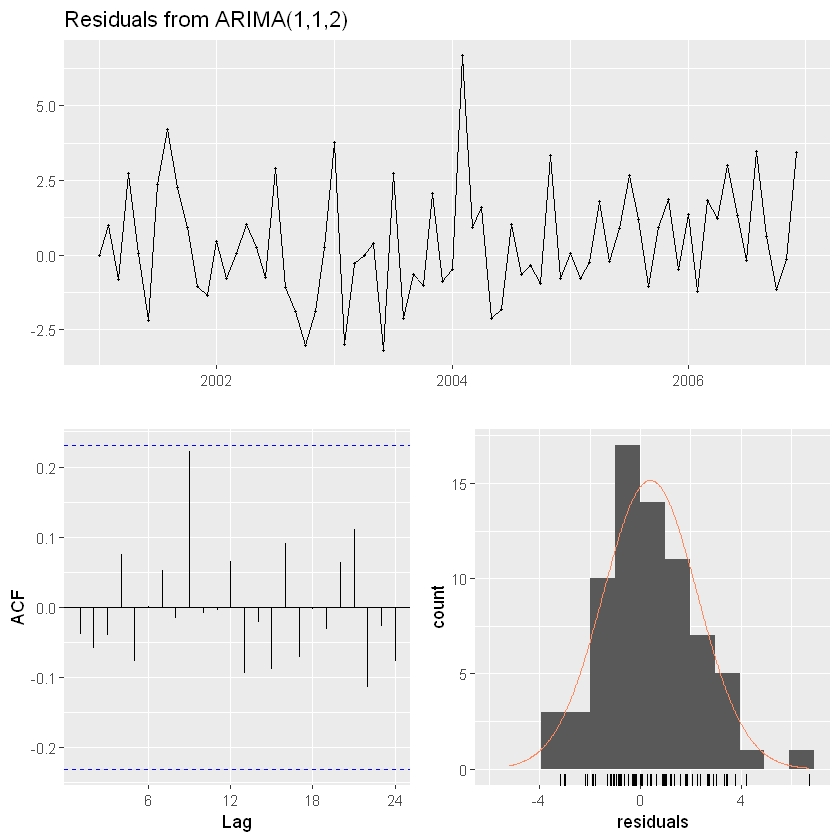

In [33]:
# 최종모델선정한 ARIMA(1,1,2) 잔차검정
checkresiduals(arima112)

In [34]:
# 예측값
for_arima112<-forecast(arima112, h=5)
for_arima112

         Point Forecast     Lo 80    Hi 80    Lo 95    Hi 95
Jan 2007       7.809709  5.303317 10.31610 3.976512 11.64291
Feb 2007      13.293194 10.327625 16.25876 8.757748 17.82864
Mar 2007       9.555279  5.734232 13.37633 3.711491 15.39907
Apr 2007      12.103295  8.269410 15.93718 6.239873 17.96672
May 2007      10.366394  6.233768 14.49902 4.046088 16.68670

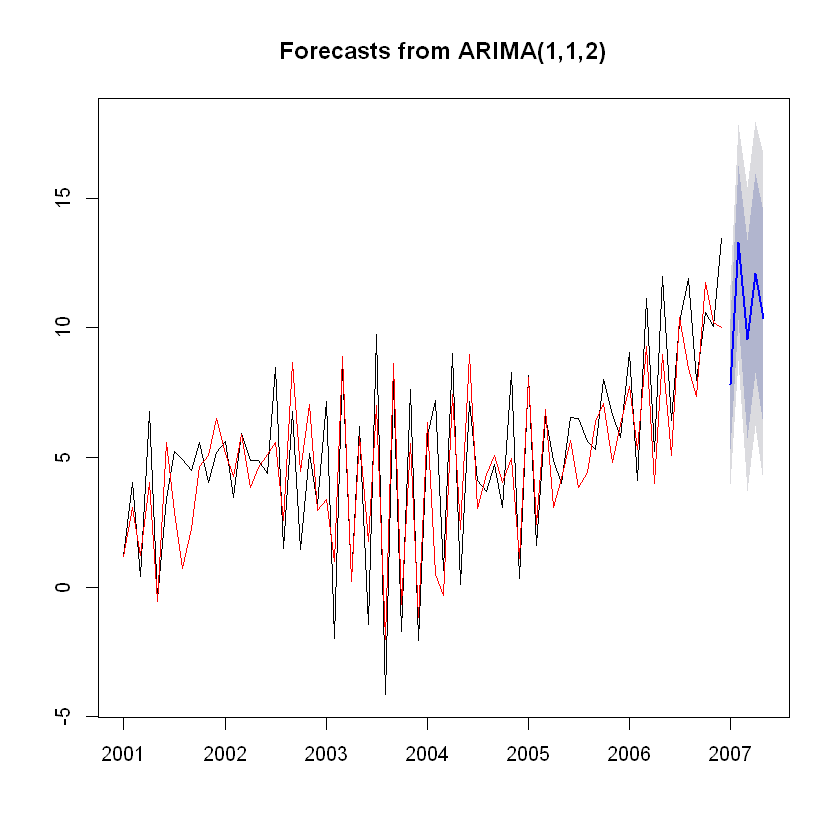

In [35]:
# plot
plot(for_arima112)
lines(for_arima112$fitted, col='red')